In [1]:
#Common Imports
from sklearn import datasets, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
from os.path import join
from tensorflow.python.keras.applications import ResNet50

C:\Users\rrsoo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
#Pandas is a module that has datasets to work with
#Below is a dataset of houses (price, lot size e.t.c)
melbourne_file_path = 'melb_data.csv'
#Reading the data set
melbourne_data = pd.read_csv(melbourne_file_path)
#Printing out the data set
#There are too many data entries to show, so count is really large
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [8]:
#Gives us a list of the columns
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
#Missing values in a data set can be problematic so...
melbourne_data = melbourne_data.dropna(axis = 0)

In [10]:
#We can select certain columns to predict using dot notation; called the prediction target labeled y
y = melbourne_data.Price
#The columns in the data are called features; we can select certain features this way...
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Longtitude', 'Lattitude']
x = melbourne_data[melbourne_features]
x.describe()

,Rooms,Bathroom,Landsize,Longtitude,Lattitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,144.990201,-37.807904
std,0.971079,0.711362,897.449881,0.099165,0.075850
min,1.000000,1.000000,0.000000,144.542370,-38.164920
25%,2.000000,1.000000,152.000000,144.926198,-37.855438
50%,3.000000,1.000000,373.000000,144.995800,-37.802250
75%,4.000000,2.000000,628.000000,145.052700,-37.758200
max,8.000000,8.000000,37000.000000,145.526350,-37.457090


In [21]:
x.head()

,Rooms,Bathroom,Landsize,Longtitude,Lattitude
1,2,1.0,156.0,144.9934,-37.8079
2,3,2.0,134.0,144.9944,-37.8093
4,4,1.0,120.0,144.9941,-37.8072
6,3,2.0,245.0,144.9993,-37.8024
7,2,1.0,256.0,144.9954,-37.8060


In [11]:
#We use sklearn for models
#The steps are: Define the model (tree e.t.c), Fit (capture data), Predict (the ML part), Evaluate (How accurate was the model)
from sklearn.tree import DecisionTreeRegressor
melbourne_model = DecisionTreeRegressor(random_state = 4)
melbourne_model.fit(x, y)
melbourne_model.predict(x.head())


array([1035000., 1465000., 1600000., 1876000., 1636000.])

In [ ]:
#Now we do the same for different house data

In [2]:
data_set = pd.read_csv('train.csv')
data_set.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
data_set = pd.read_csv('train.csv')
data_set.columns
y = data_set.SalePrice
some_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'PoolArea',  ]
X = data_set[some_features]
#Nan means empty or infinite array positions; we can use this function to get rid of them
X = np.nan_to_num(X)
data_set_model = DecisionTreeRegressor(random_state = 0)
data_set_model.fit(X,y)
print("Predicted House Pricing for first 5 homes in data set: ")
data_set_model.predict(X)


Predicted House Pricing for first 5 homes in data set: 


array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [4]:
#To see our model's error, we use mean absolute error
from sklearn.metrics import mean_absolute_error
predicted_home_prices = data_set_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

901.6529680365296

In [5]:
#Models are better tested with outside data
#So we split our data into training data (to build model) and validation data (to determine mean_absolute_error)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y)
data_set_model.fit(X_train, y_train)
val_predictions = data_set_model.predict(X_val)
mean_absolute_error(y_val, val_predictions)

36763.08584474886

In [11]:
#The decision tree models vary in their depth (how many leaves they have)
#Too many splits and there are not enough houses per leaf (model works poorly with new data = overfitting)
#Too few splits and the model works poorly for its own data (underfitting)
#We can use one of the parameters in DecisionTreeRegressor, max_leaf_nodes to determine the optimal split
def Mae(max_leaf_nodes, Train_X, Val_X, Train_y, Val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 1)
    model.fit(Train_X, Train_y)
    val_predict = model.predict(Val_X)
    mae = mean_absolute_error(Val_y, val_predict)
    return mae
max_leaf_options = [5,50,500,5000]
error = {i:Mae(i, X_train,X_val,y_train,y_val) for i in max_leaf_options}
print(min(error, key = error.get))


50


In [14]:
#Now on to a new modeling technique
#RandomForestRegressor is like DecisionTreeRegressor but much less error
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(X_train,y_train)
val_predictions = forest_model.predict(X_val)
error = mean_absolute_error(y_val, val_predictions)
print(error)

29360.54564970646


In [15]:
#Now for some deep learning

In [7]:
#A convolution is a small array that is used to transform an input into output
#There are vertical and horizontal convolutions
horizonatal_convolution = [[-1,-1],
                           [1, 1]]
vertical_convolution = [[1,-1],
                        [1,-1]]
#Notice how horizontal conv have the same element going left to right and vertical has the same element going up and down

In [6]:
#tensor flow, os, and other deep learning imports
import os
from os.path import join
from IPython.display import Image, display
#from learntools.deep_learning.decode_predictions import decode_predictions
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

In [1]:
#My is_hot_dog code that didn't work
def is_hot_dog(preds):
    is_hot_dog_list=[]
    t = True
    f = False
    for i in range(len(preds)):
        if preds[i][1] == 'hotdog':
            is_hot_dog_list.append(t)
        else:
            is_hot_dog_list.append(f)
    return is_hot_dog_list

In [ ]:
#The kaggle solution for is_hot_dog
def is_hot_dog(preds):
    decoded = decode_predictions(preds, top=1)
    labels = [d[0][1] for d in decoded]
    out = [l == 'hotdog' for l in labels]
    return out

In [ ]:
def calc_accuracy(model, paths_to_hotdog_images, paths_to_other_images):
    num_total_hot_dogs = len(paths_to_hotdog_images)
    num_total_other_images = len(paths_to_other_images)
    num_total = num_total_hot_dogs+num_total_other_images
    read_hot_dog = read_and_prep_images(paths_to_hotdog_images)
    read_other_images = read_and_prep_images(paths_to_other_images)
    num_correct_hot_dogs = 0
    preds_hot_dog = model.predict(read_hot_dog)
    is_hot_dog_ls = is_hot_dog(preds_hot_dog)
    for i in is_hot_dog_ls:
        if i == True:
            num_correct_hot_dogs+=1
    preds_other_images = model.predict(read_other_images)
    other_image_ls = is_hot_dog(preds_other_images)
    for j in other_image_ls:
        if j == True:
            num_correct_hot_dogs+=1
    return num_correct_hot_dogs/num_total_other_images

In [ ]:
#The VGG16 model
vgg16_model = VGG16(weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
# calculate accuracy on small dataset as a test
vgg16_accuracy = calc_accuracy(vgg16_model, hot_dog_paths, not_hot_dog_paths)

print("Fraction correct in small dataset: {}".format(vgg16_accuracy))

In [24]:
val_loss,val_acc = model.evaluate(X_val,y_val)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 22us/step
0.09574010922443121 0.9693


In [ ]:
'''Neural networks is basically a very complicated function with multiple layers; the first layers is input, them there are
multiple hidden layers and an outer layer. Each node of a layers has weights which multiply each value of the previous layer and
give the weighted sum. You can take a model and add layers as necessary. Important terms: Dense (connects layers together), 
Compile(), loss (measure of how accurate a prediction is), optimizer, gradient descent (takes data and tries to minimize loss by finding 
slopes at local minimums), stochastical gradient descent, batch size (how many images you are working with at a time)
epoch (the times you go through the images wih model), propogation (altering the weights to get the most accurate results)

In [46]:
#Incomplete fashion model (mnist)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
fashion_model = Sequential()
fashion_model.add(Conv2D(20, kernel_size=3, input_shape = (128,128,3), activation = 'relu'))
fashion_model.add(Conv2D(20, kernel_size=3, activation = 'relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(100, activation = 'relu'))
fashion_model.add(Dense(10, activation = 'softmax'))
fashion_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#Explain

In [7]:
#Failed Mnist model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Flatten
(Train_X, Val_X), (Train_y, Val_y) = mnist.load_data()
model = Sequential()
model.add(Flatten())
model.add(Conv2D(filters = 16, data_format = 'channels_last', padding = 'same', kernel_size = (3,3), input_shape = (28,28,1),
                 activation = 'relu'))
model.add(Conv2D(filters = 16, padding = 'same', kernel_size = (3,3), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(Train_X, Train_y, batch_size = 10, epochs = 4, validation_split = 0.2)

ValueError: Input 0 of layer conv2d_8 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 784]

In [1]:
#Working Mnist model
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_val,axis = 1)
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam',loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 4)
  

C:\Users\rrsoo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Epoch 1/4
60000/60000 [==============================] - 8s 134us/step - loss: 0.2643 - acc: 0.9236
Epoch 2/4
60000/60000 [==============================] - 7s 119us/step - loss: 0.1101 - acc: 0.9662
Epoch 3/4
60000/60000 [==============================] - 7s 116us/step - loss: 0.0735 - acc: 0.9772
Epoch 4/4
60000/60000 [==============================] - 7s 120us/step - loss: 0.0559 - acc: 0.9819


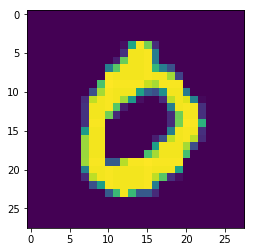

0


In [4]:
n = 3
import matplotlib.pyplot as plt
import numpy as np
predict = model.predict(X_val)
plt.imshow(X_val[n])
plt.show()
print(np.argmax(predict[n]))

In [30]:
import numpy as np
X_vals = np.array([0,1,2,3,4], dtype = float)
y_vals = np.array([-1,1,3,5,7], dtype = float)
#y=3x+2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([Dense(units = 1, input_shape = [1])])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
model.fit(X_vals,y_vals, epochs = 1500)

Epoch 1/1500
5/5 [==============================] - 0s 99ms/step - loss: 15.6649 - acc: 0.0000e+00
Epoch 2/1500
5/5 [==============================] - 0s 191us/step - loss: 11.9253 - acc: 0.0000e+00
Epoch 3/1500
5/5 [==============================] - 0s 392us/step - loss: 9.1189 - acc: 0.2000
Epoch 4/1500
5/5 [==============================] - 0s 399us/step - loss: 7.0122 - acc: 0.2000
Epoch 5/1500
5/5 [==============================] - 0s 413us/step - loss: 5.4303 - acc: 0.2000
Epoch 6/1500
5/5 [==============================] - 0s 399us/step - loss: 4.2420 - acc: 0.2000
Epoch 7/1500
5/5 [==============================] - 0s 400us/step - loss: 3.3489 - acc: 0.2000
Epoch 8/1500
5/5 [==============================] - 0s 399us/step - loss: 2.6772 - acc: 0.2000
Epoch 9/1500
5/5 [==============================] - 0s 399us/step - loss: 2.1714 - acc: 0.2000
Epoch 10/1500
5/5 [==============================] - 0s 341us/step - loss: 1.7902 - acc: 0.4000
Epoch 11/1500
5/5 [=====================

Epoch 87/1500
5/5 [==============================] - 0s 285us/step - loss: 0.2671 - acc: 0.6000
Epoch 88/1500
5/5 [==============================] - 0s 199us/step - loss: 0.2639 - acc: 0.6000
Epoch 89/1500
5/5 [==============================] - 0s 199us/step - loss: 0.2608 - acc: 0.6000
Epoch 90/1500
5/5 [==============================] - 0s 200us/step - loss: 0.2577 - acc: 0.6000
Epoch 91/1500
5/5 [==============================] - 0s 200us/step - loss: 0.2546 - acc: 0.6000
Epoch 92/1500
5/5 [==============================] - 0s 233us/step - loss: 0.2516 - acc: 0.6000
Epoch 93/1500
5/5 [==============================] - 0s 415us/step - loss: 0.2486 - acc: 0.6000
Epoch 94/1500
5/5 [==============================] - 0s 200us/step - loss: 0.2456 - acc: 0.6000
Epoch 95/1500
5/5 [==============================] - 0s 405us/step - loss: 0.2427 - acc: 0.6000
Epoch 96/1500
5/5 [==============================] - 0s 200us/step - loss: 0.2398 - acc: 0.6000
Epoch 97/1500
5/5 [=====================

Epoch 172/1500
5/5 [==============================] - 0s 206us/step - loss: 0.0965 - acc: 0.8000
Epoch 173/1500
5/5 [==============================] - 0s 221us/step - loss: 0.0954 - acc: 0.8000
Epoch 174/1500
5/5 [==============================] - 0s 249us/step - loss: 0.0942 - acc: 0.8000
Epoch 175/1500
5/5 [==============================] - 0s 193us/step - loss: 0.0931 - acc: 0.8000
Epoch 176/1500
5/5 [==============================] - 0s 193us/step - loss: 0.0920 - acc: 0.8000
Epoch 177/1500
5/5 [==============================] - 0s 394us/step - loss: 0.0909 - acc: 0.8000
Epoch 178/1500
5/5 [==============================] - 0s 198us/step - loss: 0.0898 - acc: 0.8000
Epoch 179/1500
5/5 [==============================] - 0s 408us/step - loss: 0.0888 - acc: 0.8000
Epoch 180/1500
5/5 [==============================] - 0s 201us/step - loss: 0.0877 - acc: 0.8000
Epoch 181/1500
5/5 [==============================] - 0s 198us/step - loss: 0.0867 - acc: 0.8000
Epoch 182/1500
5/5 [==========

Epoch 257/1500
5/5 [==============================] - 0s 598us/step - loss: 0.0349 - acc: 1.0000
Epoch 258/1500
5/5 [==============================] - 0s 397us/step - loss: 0.0345 - acc: 1.0000
Epoch 259/1500
5/5 [==============================] - 0s 200us/step - loss: 0.0341 - acc: 1.0000
Epoch 260/1500
5/5 [==============================] - 0s 230us/step - loss: 0.0337 - acc: 1.0000
Epoch 261/1500
5/5 [==============================] - 0s 392us/step - loss: 0.0333 - acc: 1.0000
Epoch 262/1500
5/5 [==============================] - 0s 297us/step - loss: 0.0329 - acc: 1.0000
Epoch 263/1500
5/5 [==============================] - 0s 401us/step - loss: 0.0325 - acc: 1.0000
Epoch 264/1500
5/5 [==============================] - 0s 423us/step - loss: 0.0321 - acc: 1.0000
Epoch 265/1500
5/5 [==============================] - 0s 337us/step - loss: 0.0317 - acc: 1.0000
Epoch 266/1500
5/5 [==============================] - 0s 398us/step - loss: 0.0313 - acc: 1.0000
Epoch 267/1500
5/5 [==========

Epoch 342/1500
5/5 [==============================] - 0s 403us/step - loss: 0.0126 - acc: 1.0000
Epoch 343/1500
5/5 [==============================] - 0s 397us/step - loss: 0.0125 - acc: 1.0000
Epoch 344/1500
5/5 [==============================] - 0s 193us/step - loss: 0.0123 - acc: 1.0000
Epoch 345/1500
5/5 [==============================] - 0s 193us/step - loss: 0.0122 - acc: 1.0000
Epoch 346/1500
5/5 [==============================] - 0s 406us/step - loss: 0.0120 - acc: 1.0000
Epoch 347/1500
5/5 [==============================] - 0s 391us/step - loss: 0.0119 - acc: 1.0000
Epoch 348/1500
5/5 [==============================] - 0s 358us/step - loss: 0.0117 - acc: 1.0000
Epoch 349/1500
5/5 [==============================] - 0s 198us/step - loss: 0.0116 - acc: 1.0000
Epoch 350/1500
5/5 [==============================] - 0s 193us/step - loss: 0.0115 - acc: 1.0000
Epoch 351/1500
5/5 [==============================] - 0s 312us/step - loss: 0.0113 - acc: 1.0000
Epoch 352/1500
5/5 [==========

Epoch 427/1500
5/5 [==============================] - 0s 398us/step - loss: 0.0046 - acc: 1.0000
Epoch 428/1500
5/5 [==============================] - 0s 409us/step - loss: 0.0045 - acc: 1.0000
Epoch 429/1500
5/5 [==============================] - 0s 408us/step - loss: 0.0044 - acc: 1.0000
Epoch 430/1500
5/5 [==============================] - 0s 337us/step - loss: 0.0044 - acc: 1.0000
Epoch 431/1500
5/5 [==============================] - 0s 467us/step - loss: 0.0043 - acc: 1.0000
Epoch 432/1500
5/5 [==============================] - 0s 199us/step - loss: 0.0043 - acc: 1.0000
Epoch 433/1500
5/5 [==============================] - 0s 399us/step - loss: 0.0042 - acc: 1.0000
Epoch 434/1500
5/5 [==============================] - 0s 399us/step - loss: 0.0042 - acc: 1.0000
Epoch 435/1500
5/5 [==============================] - 0s 394us/step - loss: 0.0041 - acc: 1.0000
Epoch 436/1500
5/5 [==============================] - 0s 443us/step - loss: 0.0041 - acc: 1.0000
Epoch 437/1500
5/5 [==========

Epoch 512/1500
5/5 [==============================] - 0s 199us/step - loss: 0.0016 - acc: 1.0000
Epoch 513/1500
5/5 [==============================] - 0s 598us/step - loss: 0.0016 - acc: 1.0000
Epoch 514/1500
5/5 [==============================] - 0s 308us/step - loss: 0.0016 - acc: 1.0000
Epoch 515/1500
5/5 [==============================] - 0s 400us/step - loss: 0.0016 - acc: 1.0000
Epoch 516/1500
5/5 [==============================] - 0s 399us/step - loss: 0.0016 - acc: 1.0000
Epoch 517/1500
5/5 [==============================] - 0s 381us/step - loss: 0.0016 - acc: 1.0000
Epoch 518/1500
5/5 [==============================] - 0s 378us/step - loss: 0.0015 - acc: 1.0000
Epoch 519/1500
5/5 [==============================] - 0s 615us/step - loss: 0.0015 - acc: 1.0000
Epoch 520/1500
5/5 [==============================] - 0s 340us/step - loss: 0.0015 - acc: 1.0000
Epoch 521/1500
5/5 [==============================] - 0s 722us/step - loss: 0.0015 - acc: 1.0000
Epoch 522/1500
5/5 [==========

Epoch 595/1500
5/5 [==============================] - 0s 605us/step - loss: 6.0968e-04 - acc: 1.0000
Epoch 596/1500
5/5 [==============================] - 0s 347us/step - loss: 6.0243e-04 - acc: 1.0000
Epoch 597/1500
5/5 [==============================] - 0s 290us/step - loss: 5.9525e-04 - acc: 1.0000
Epoch 598/1500
5/5 [==============================] - 0s 200us/step - loss: 5.8817e-04 - acc: 1.0000
Epoch 599/1500
5/5 [==============================] - 0s 180us/step - loss: 5.8117e-04 - acc: 1.0000
Epoch 600/1500
5/5 [==============================] - 0s 192us/step - loss: 5.7425e-04 - acc: 1.0000
Epoch 601/1500
5/5 [==============================] - 0s 399us/step - loss: 5.6742e-04 - acc: 1.0000
Epoch 602/1500
5/5 [==============================] - 0s 384us/step - loss: 5.6066e-04 - acc: 1.0000
Epoch 603/1500
5/5 [==============================] - 0s 404us/step - loss: 5.5399e-04 - acc: 1.0000
Epoch 604/1500
5/5 [==============================] - 0s 398us/step - loss: 5.4740e-04 - ac

Epoch 677/1500
5/5 [==============================] - 0s 196us/step - loss: 2.2840e-04 - acc: 1.0000
Epoch 678/1500
5/5 [==============================] - 0s 206us/step - loss: 2.2568e-04 - acc: 1.0000
Epoch 679/1500
5/5 [==============================] - 0s 304us/step - loss: 2.2300e-04 - acc: 1.0000
Epoch 680/1500
5/5 [==============================] - 0s 199us/step - loss: 2.2034e-04 - acc: 1.0000
Epoch 681/1500
5/5 [==============================] - 0s 266us/step - loss: 2.1772e-04 - acc: 1.0000
Epoch 682/1500
5/5 [==============================] - 0s 199us/step - loss: 2.1513e-04 - acc: 1.0000
Epoch 683/1500
5/5 [==============================] - 0s 346us/step - loss: 2.1257e-04 - acc: 1.0000
Epoch 684/1500
5/5 [==============================] - 0s 394us/step - loss: 2.1004e-04 - acc: 1.0000
Epoch 685/1500
5/5 [==============================] - 0s 202us/step - loss: 2.0754e-04 - acc: 1.0000
Epoch 686/1500
5/5 [==============================] - 0s 201us/step - loss: 2.0507e-04 - ac

Epoch 759/1500
5/5 [==============================] - 0s 319us/step - loss: 8.5566e-05 - acc: 1.0000
Epoch 760/1500
5/5 [==============================] - 0s 279us/step - loss: 8.4548e-05 - acc: 1.0000
Epoch 761/1500
5/5 [==============================] - 0s 449us/step - loss: 8.3541e-05 - acc: 1.0000
Epoch 762/1500
5/5 [==============================] - 0s 188us/step - loss: 8.2547e-05 - acc: 1.0000
Epoch 763/1500
5/5 [==============================] - 0s 301us/step - loss: 8.1564e-05 - acc: 1.0000
Epoch 764/1500
5/5 [==============================] - 0s 200us/step - loss: 8.0594e-05 - acc: 1.0000
Epoch 765/1500
5/5 [==============================] - 0s 407us/step - loss: 7.9634e-05 - acc: 1.0000
Epoch 766/1500
5/5 [==============================] - 0s 605us/step - loss: 7.8686e-05 - acc: 1.0000
Epoch 767/1500
5/5 [==============================] - 0s 399us/step - loss: 7.7751e-05 - acc: 1.0000
Epoch 768/1500
5/5 [==============================] - 0s 592us/step - loss: 7.6824e-05 - ac

Epoch 841/1500
5/5 [==============================] - 0s 405us/step - loss: 3.2056e-05 - acc: 1.0000
Epoch 842/1500
5/5 [==============================] - 0s 399us/step - loss: 3.1675e-05 - acc: 1.0000
Epoch 843/1500
5/5 [==============================] - 0s 393us/step - loss: 3.1298e-05 - acc: 1.0000
Epoch 844/1500
5/5 [==============================] - 0s 611us/step - loss: 3.0925e-05 - acc: 1.0000
Epoch 845/1500
5/5 [==============================] - 0s 196us/step - loss: 3.0558e-05 - acc: 1.0000
Epoch 846/1500
5/5 [==============================] - 0s 341us/step - loss: 3.0193e-05 - acc: 1.0000
Epoch 847/1500
5/5 [==============================] - 0s 198us/step - loss: 2.9834e-05 - acc: 1.0000
Epoch 848/1500
5/5 [==============================] - 0s 200us/step - loss: 2.9479e-05 - acc: 1.0000
Epoch 849/1500
5/5 [==============================] - 0s 186us/step - loss: 2.9127e-05 - acc: 1.0000
Epoch 850/1500
5/5 [==============================] - 0s 399us/step - loss: 2.8781e-05 - ac

Epoch 923/1500
5/5 [==============================] - 0s 399us/step - loss: 1.2009e-05 - acc: 1.0000
Epoch 924/1500
5/5 [==============================] - 0s 192us/step - loss: 1.1866e-05 - acc: 1.0000
Epoch 925/1500
5/5 [==============================] - 0s 400us/step - loss: 1.1725e-05 - acc: 1.0000
Epoch 926/1500
5/5 [==============================] - 0s 200us/step - loss: 1.1585e-05 - acc: 1.0000
Epoch 927/1500
5/5 [==============================] - 0s 403us/step - loss: 1.1447e-05 - acc: 1.0000
Epoch 928/1500
5/5 [==============================] - 0s 179us/step - loss: 1.1311e-05 - acc: 1.0000
Epoch 929/1500
5/5 [==============================] - 0s 386us/step - loss: 1.1176e-05 - acc: 1.0000
Epoch 930/1500
5/5 [==============================] - 0s 319us/step - loss: 1.1043e-05 - acc: 1.0000
Epoch 931/1500
5/5 [==============================] - 0s 200us/step - loss: 1.0912e-05 - acc: 1.0000
Epoch 932/1500
5/5 [==============================] - 0s 401us/step - loss: 1.0782e-05 - ac

Epoch 1005/1500
5/5 [==============================] - 0s 399us/step - loss: 4.4989e-06 - acc: 1.0000
Epoch 1006/1500
5/5 [==============================] - 0s 399us/step - loss: 4.4451e-06 - acc: 1.0000
Epoch 1007/1500
5/5 [==============================] - 0s 421us/step - loss: 4.3923e-06 - acc: 1.0000
Epoch 1008/1500
5/5 [==============================] - 0s 393us/step - loss: 4.3400e-06 - acc: 1.0000
Epoch 1009/1500
5/5 [==============================] - 0s 258us/step - loss: 4.2884e-06 - acc: 1.0000
Epoch 1010/1500
5/5 [==============================] - 0s 199us/step - loss: 4.2372e-06 - acc: 1.0000
Epoch 1011/1500
5/5 [==============================] - 0s 199us/step - loss: 4.1869e-06 - acc: 1.0000
Epoch 1012/1500
5/5 [==============================] - 0s 191us/step - loss: 4.1371e-06 - acc: 1.0000
Epoch 1013/1500
5/5 [==============================] - 0s 400us/step - loss: 4.0878e-06 - acc: 1.0000
Epoch 1014/1500
5/5 [==============================] - 0s 252us/step - loss: 4.039

Epoch 1086/1500
5/5 [==============================] - 0s 161us/step - loss: 1.7055e-06 - acc: 1.0000
Epoch 1087/1500
5/5 [==============================] - 0s 398us/step - loss: 1.6853e-06 - acc: 1.0000
Epoch 1088/1500
5/5 [==============================] - 0s 414us/step - loss: 1.6652e-06 - acc: 1.0000
Epoch 1089/1500
5/5 [==============================] - 0s 233us/step - loss: 1.6454e-06 - acc: 1.0000
Epoch 1090/1500
5/5 [==============================] - 0s 401us/step - loss: 1.6256e-06 - acc: 1.0000
Epoch 1091/1500
5/5 [==============================] - 0s 399us/step - loss: 1.6063e-06 - acc: 1.0000
Epoch 1092/1500
5/5 [==============================] - 0s 200us/step - loss: 1.5871e-06 - acc: 1.0000
Epoch 1093/1500
5/5 [==============================] - 0s 399us/step - loss: 1.5682e-06 - acc: 1.0000
Epoch 1094/1500
5/5 [==============================] - 0s 553us/step - loss: 1.5497e-06 - acc: 1.0000
Epoch 1095/1500
5/5 [==============================] - 0s 188us/step - loss: 1.531

Epoch 1167/1500
5/5 [==============================] - 0s 399us/step - loss: 6.4672e-07 - acc: 1.0000
Epoch 1168/1500
5/5 [==============================] - 0s 598us/step - loss: 6.3896e-07 - acc: 1.0000
Epoch 1169/1500
5/5 [==============================] - 0s 285us/step - loss: 6.3137e-07 - acc: 1.0000
Epoch 1170/1500
5/5 [==============================] - 0s 207us/step - loss: 6.2397e-07 - acc: 1.0000
Epoch 1171/1500
5/5 [==============================] - 0s 213us/step - loss: 6.1654e-07 - acc: 1.0000
Epoch 1172/1500
5/5 [==============================] - 0s 193us/step - loss: 6.0919e-07 - acc: 1.0000
Epoch 1173/1500
5/5 [==============================] - 0s 85us/step - loss: 6.0191e-07 - acc: 1.0000
Epoch 1174/1500
5/5 [==============================] - 0s 200us/step - loss: 5.9468e-07 - acc: 1.0000
Epoch 1175/1500
5/5 [==============================] - 0s 399us/step - loss: 5.8767e-07 - acc: 1.0000
Epoch 1176/1500
5/5 [==============================] - 0s 598us/step - loss: 5.8070

Epoch 1248/1500
5/5 [==============================] - 0s 369us/step - loss: 2.4530e-07 - acc: 1.0000
Epoch 1249/1500
5/5 [==============================] - 0s 199us/step - loss: 2.4240e-07 - acc: 1.0000
Epoch 1250/1500
5/5 [==============================] - 0s 485us/step - loss: 2.3950e-07 - acc: 1.0000
Epoch 1251/1500
5/5 [==============================] - 0s 660us/step - loss: 2.3666e-07 - acc: 1.0000
Epoch 1252/1500
5/5 [==============================] - 0s 679us/step - loss: 2.3378e-07 - acc: 1.0000
Epoch 1253/1500
5/5 [==============================] - 0s 394us/step - loss: 2.3103e-07 - acc: 1.0000
Epoch 1254/1500
5/5 [==============================] - 0s 400us/step - loss: 2.2826e-07 - acc: 1.0000
Epoch 1255/1500
5/5 [==============================] - 0s 399us/step - loss: 2.2559e-07 - acc: 1.0000
Epoch 1256/1500
5/5 [==============================] - 0s 200us/step - loss: 2.2287e-07 - acc: 1.0000
Epoch 1257/1500
5/5 [==============================] - 0s 399us/step - loss: 2.202

Epoch 1329/1500
5/5 [==============================] - 0s 399us/step - loss: 9.3085e-08 - acc: 1.0000
Epoch 1330/1500
5/5 [==============================] - 0s 414us/step - loss: 9.1988e-08 - acc: 1.0000
Epoch 1331/1500
5/5 [==============================] - 0s 400us/step - loss: 9.0885e-08 - acc: 1.0000
Epoch 1332/1500
5/5 [==============================] - 0s 413us/step - loss: 8.9789e-08 - acc: 1.0000
Epoch 1333/1500
5/5 [==============================] - 0s 387us/step - loss: 8.8735e-08 - acc: 1.0000
Epoch 1334/1500
5/5 [==============================] - 0s 399us/step - loss: 8.7664e-08 - acc: 1.0000
Epoch 1335/1500
5/5 [==============================] - 0s 221us/step - loss: 8.6670e-08 - acc: 1.0000
Epoch 1336/1500
5/5 [==============================] - 0s 434us/step - loss: 8.5622e-08 - acc: 1.0000
Epoch 1337/1500
5/5 [==============================] - 0s 391us/step - loss: 8.4610e-08 - acc: 1.0000
Epoch 1338/1500
5/5 [==============================] - 0s 333us/step - loss: 8.358

Epoch 1410/1500
5/5 [==============================] - 0s 690us/step - loss: 3.5338e-08 - acc: 1.0000
Epoch 1411/1500
5/5 [==============================] - 0s 399us/step - loss: 3.4919e-08 - acc: 1.0000
Epoch 1412/1500
5/5 [==============================] - 0s 322us/step - loss: 3.4506e-08 - acc: 1.0000
Epoch 1413/1500
5/5 [==============================] - 0s 400us/step - loss: 3.4096e-08 - acc: 1.0000
Epoch 1414/1500
5/5 [==============================] - 0s 200us/step - loss: 3.3684e-08 - acc: 1.0000
Epoch 1415/1500
5/5 [==============================] - 0s 404us/step - loss: 3.3275e-08 - acc: 1.0000
Epoch 1416/1500
5/5 [==============================] - 0s 406us/step - loss: 3.2890e-08 - acc: 1.0000
Epoch 1417/1500
5/5 [==============================] - 0s 190us/step - loss: 3.2493e-08 - acc: 1.0000
Epoch 1418/1500
5/5 [==============================] - 0s 592us/step - loss: 3.2117e-08 - acc: 1.0000
Epoch 1419/1500
5/5 [==============================] - 0s 398us/step - loss: 3.173

Epoch 1491/1500
5/5 [==============================] - 0s 199us/step - loss: 1.3442e-08 - acc: 1.0000
Epoch 1492/1500
5/5 [==============================] - 0s 200us/step - loss: 1.3277e-08 - acc: 1.0000
Epoch 1493/1500
5/5 [==============================] - 0s 569us/step - loss: 1.3128e-08 - acc: 1.0000
Epoch 1494/1500
5/5 [==============================] - 0s 487us/step - loss: 1.2961e-08 - acc: 1.0000
Epoch 1495/1500
5/5 [==============================] - 0s 194us/step - loss: 1.2814e-08 - acc: 1.0000
Epoch 1496/1500
5/5 [==============================] - 0s 345us/step - loss: 1.2649e-08 - acc: 1.0000
Epoch 1497/1500
5/5 [==============================] - 0s 399us/step - loss: 1.2514e-08 - acc: 1.0000
Epoch 1498/1500
5/5 [==============================] - 0s 381us/step - loss: 1.2363e-08 - acc: 1.0000
Epoch 1499/1500
5/5 [==============================] - 0s 242us/step - loss: 1.2226e-08 - acc: 1.0000
Epoch 1500/1500
5/5 [==============================] - 0s 414us/step - loss: 1.207

In [31]:
print(model.predict([5]))

[[8.999857]]


In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
import tensorflow
from tensorflow.keras.datasets import mnist
model = Sequential()
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
x_train = tensorflow.keras.utils.normalize(x_train, axis = 1)
x_val = tensorflow.keras.utils.normalize(x_val, axis = 1)
model.add(Flatten())
model.add(Dense(16, activation = 'relu', input_shape = [4,]))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
50000/50000 [==============================] - 3s 56us/step - loss: 20.5000 - acc: 0.1000
Epoch 2/5
50000/50000 [==============================] - 2s 48us/step - loss: 20.5000 - acc: 0.1000
Epoch 3/5
50000/50000 [==============================] - 2s 46us/step - loss: 20.5000 - acc: 0.1000
Epoch 4/5
50000/50000 [==============================] - 2s 49us/step - loss: 20.5000 - acc: 0.1000
Epoch 5/5
50000/50000 [==============================] - 2s 45us/step - loss: 20.5000 - acc: 0.1000


TypeError: 'tuple' object is not callable

In [3]:
#Another method of building a CNN
pool_size = (4,4)
kernal_size = (4,4)

x_in = tf.keras.layers.Input(shape=(256,256,3))

x = tf.keras.layers.Conv2D(filters=32, kernel_size=kernal_size, activation='relu')(x_in)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=kernal_size, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=kernal_size, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x_flatten = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x_flatten)

x_out = tf.keras.layers.Dense(2, activation='softmax')(x)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                49168     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 49,457
Trainable params: 49,457
Non-trainable params: 0
_________________________________________________________________
